# Homework III 

## Image Preparation

In [ ]:
!wget https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL  -O Homeworks/Homework_3/images/kitty55.png
!wget https://drive.google.com/uc?id=11wi3AkNNpyvbOuJlGAHHrpyCesO6_d2I  -O Homeworks/Homework_3/images/coins.zip
!wget https://drive.google.com/uc?id=1B2DdZ4MPuCcEr9sXSy9g5bR9nD7veBOR  -O Homeworks/Homework_3/images/pyri.zip
!wget https://drive.google.com/uc?id=15Qs_2kJ7scBEDLc8YQ2bi0U6PKiLpnmn  -O Homeworks/Homework_3/images/gemini.jpg

!unzip Homeworks/Homework_3/images/coins.zip -d Homeworks/Homework_3/images
!unzip Homeworks/Homework_3/images/pyri.zip -d Homeworks/Homework_3/images

!rm -rf Homeworks/Homework_3/images/coins.zip 
!rm -rf Homeworks/Homework_3/images/pyri.zip

--2025-11-19 15:49:25--  https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.google.com (drive.google.com)... 142.250.204.110, 2404:6800:4016:80b::200e
Connecting to drive.google.com (drive.google.com)|142.250.204.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL [following]
--2025-11-19 15:49:26--  https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.66.97, 2404:6800:4016:808::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.66.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112875 (110K) [image/png]
Saving to: ‘Homeworks/Homework_3/images/kitty55.png’

Homeworks/Homework_ 100%[===================>] 110.23K  --.-KB/s    in 0.04s   

2025-11-19 15:49:27 (2.51 MB/s)

^C


## Part I

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [2]:
# ---------------------------------------------------------
# ส่วนที่ 1: เตรียมรูปภาพ (โหลดจาก URL หรืออัพโหลดเอง)
# ---------------------------------------------------------
img = Image.open("Homeworks/Homework_3/images/selected_image.jpg")

In [3]:
# ---------------------------------------------------------
# ส่วนที่ 2: นิยาม 5 เทคนิค Augmentation (ตามโจทย์ข้อ 1)
# ---------------------------------------------------------

# 1. Random Horizontal Flip (กลับด้านซ้ายขวา)
# เหมาะสำหรับเพิ่มข้อมูลในกรณีที่วัตถุหันหน้าไปทางไหนก็ได้
transform_1 = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0), # p=1.0 คือบังคับให้กลับด้านเพื่อให้เห็นผลชัดเจน
    transforms.Resize((224, 224)),          # ปรับขนาดให้เท่ากัน
    transforms.ToTensor(),
])

# 2. Color Jitter (ปรับแต่งสีและความสว่าง)
# จำลองสภาพแสงที่แตกต่างกัน (สว่างมาก, มืด, สีเพี้ยน)
transform_2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 3. Gaussian Blur (ทำภาพเบลอ)
# จำลองภาพที่หลุดโฟกัส หรือภาพที่มีความละเอียดต่ำ
transform_3 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 4. Random Affine (Shear/บิดภาพ)
# การบิดภาพช่วยให้โมเดลเรียนรู้วัตถุในมุมมองที่ผิดเพี้ยนไปจากปกติ
transform_4 = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=None, scale=None, shear=20),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 5. Random Grayscale (เปลี่ยนเป็นขาวดำ)
# ช่วยให้โมเดลโฟกัสที่รูปร่าง (Shape/Texture) มากกว่าสี
transform_5 = transforms.Compose([
    transforms.RandomGrayscale(p=1.0),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# รวมเทคนิคทั้งหมดไว้ใน List เพื่อนำไปวนลูปแสดงผล
aug_list = [transform_1, transform_2, transform_3, transform_4, transform_5]
aug_names = ["1. Horizontal Flip", "2. Color Jitter", "3. Gaussian Blur", "4. Affine (Shear)", "5. Grayscale"]

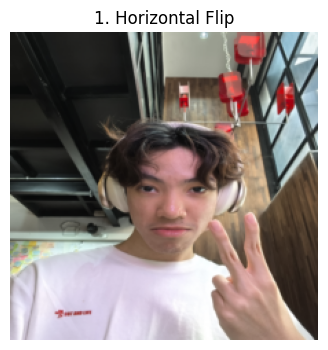

In [4]:
aug_tensor = transform_1(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[0])
plt.axis('off')
plt.show()

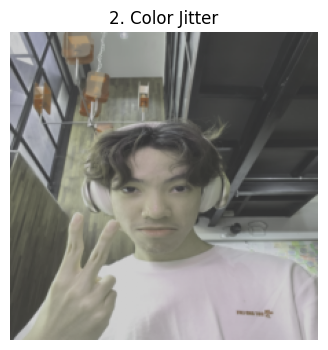

In [5]:
aug_tensor = transform_2(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[1])
plt.axis('off')
plt.show()

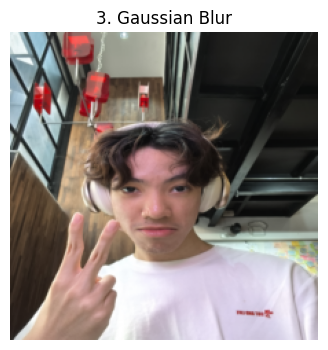

In [6]:
aug_tensor = transform_3(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[2])
plt.axis('off')
plt.show()

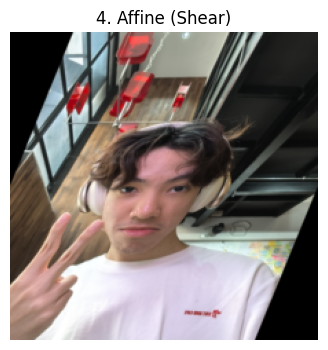

In [7]:
aug_tensor = transform_4(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[3])
plt.axis('off')
plt.show()

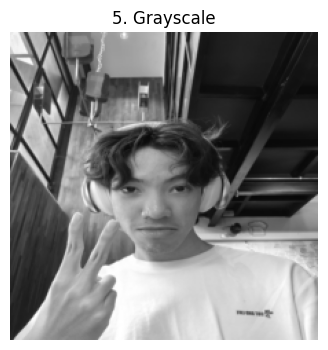

In [8]:
aug_tensor = transform_5(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[4])
plt.axis('off')
plt.show()

## Part II

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def count_thai_coins(image_path, param2=30, min_dist=100):
    """
    ฟังก์ชันสำหรับนับเหรียญไทย (1, 2, 5, 10 บาท)
    image_path: path ของรูปภาพ
    param2: ค่า threshold ของ HoughCircles (ค่ายิ่งน้อย เจอวงกลมง่าย แต่อาจเจอวงมั่ว, ค่ายิ่งมาก เจอวงกลมยากขึ้น)
    min_dist: ระยะห่างต่ำสุดระหว่างจุดศูนย์กลางของวงกลม
    """
    
    # 1. อ่านภาพ
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: ไม่สามารถอ่านไฟล์ {image_path} ได้")
        return

    output_img = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 2. Preprocessing: Blur ภาพเพื่อลด Noise (สำคัญมาก)
    gray_blurred = cv2.GaussianBlur(gray, (13, 13), 0)

    # 3. Detect Circles (Hough Circle Transform)
    circles = cv2.HoughCircles(
        gray_blurred, 
        cv2.HOUGH_GRADIENT, 
        dp=1.2, 
        minDist=min_dist,  # ระยะห่างระหว่างเหรียญ ถ้าวางชิดกันมากลดค่านี่ลง
        param1=50,         # Gradient value (Canny edge)
        param2=param2,     # Accumulator threshold (สำคัญ: ปรับค่านี้ถ้าเจอเหรียญไม่ครบหรือเจอเยอะเกิน)
        minRadius=50,      # รัศมีต่ำสุดที่เป็นไปได้
        maxRadius=100      # รัศมีสูงสุดที่เป็นไปได้
    )

    coin_data = [] # เก็บข้อมูลเหรียญ (x, y, r, saturation)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")

        # 4. Feature Extraction: ดึงค่าสีและขนาด
        for (x, y, r) in circles:
            # ตัดภาพเฉพาะส่วนเหรียญ (ROI)
            roi = img[y-r:y+r, x-r:x+r]
            if roi.size == 0: continue
            
            # แปลงเป็น HSV เพื่อดูค่า Saturation (ความสดของสี) -> ใช้แยก ทอง vs เงิน
            hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
            sat_mean = np.mean(hsv[:, :, 1]) # Channel 1 คือ Saturation
            
            coin_data.append({'x': x, 'y': y, 'r': r, 'sat': sat_mean})

        # 5. Classification Logic: แยกประเภทเหรียญ
        # เรียงลำดับตามขนาด (ใหญ่ -> เล็ก) เพื่อเปรียบเทียบสัมพัทธ์
        coin_data.sort(key=lambda c: c['r'], reverse=True)
        
        if not coin_data:
            print("No coins valid for analysis.")
            return

        max_r = coin_data[0]['r'] # ขนาดเหรียญใหญ่สุดในภาพ
        
        results = {10: 0, 5: 0, 2: 0, 1: 0}
        total_value = 0

        for c in coin_data:
            x, y, r, sat = c['x'], c['y'], c['r'], c['sat']
            
            # Ratio เทียบกับเหรียญใหญ่สุด
            size_ratio = r / max_r 
            
            # Threshold สี (ต้องจูนตามแสงในภาพ: > 35-40 มักเป็นสีทอง)
            is_gold = sat > 35 

            value = 0
            
            # Rule-based Classification
            if size_ratio > 0.9: 
                # กลุ่มเหรียญใหญ่ (10 หรือ 5)
                # ปกติ 10 ใหญ่สุด แต่บางที 5 ก็ใกล้เคียง ให้ดูสีช่วย
                if is_gold:
                    value = 10 # ใหญ่ + มีสีทอง(ตรงกลาง) = 10
                elif sat > 20: 
                    value = 10 # กรณี 10 บาทแสงสะท้อนจนซีด แต่ยังมีความเข้มกว่า 5 บาท
                else:
                    value = 5  # ใหญ่ + ขาวซีด = 5
            
            elif size_ratio > 0.75:
                # กลุ่มขนาดกลาง (5 หรือ 2)
                # ถ้า 5 บาทเล็กกว่า 10 ชัดเจนจะตกมากลุ่มนี้
                if is_gold:
                    value = 2 # ขนาดกลาง + ทอง = 2 (กรณีถ่ายไกล)
                else:
                    value = 5 # ขนาดกลาง + เงิน = 5
            
            else:
                # กลุ่มขนาดเล็ก (2 หรือ 1)
                if is_gold:
                    value = 2 # เล็ก + ทอง = 2
                else:
                    value = 1 # เล็ก + เงิน = 1

            # บันทึกผล
            results[value] += 1
            total_value += value
            
            # วาดวงกลมและเขียนตัวเลข
            color_circle = (0, 255, 0) # สีเขียว
            cv2.circle(output_img, (x, y), r, color_circle, 3)
            cv2.circle(output_img, (x, y), 2, (0, 0, 255), 3) # จุดศูนย์กลาง
            label = f"{value}"
            cv2.putText(output_img, label, (x-15, y+10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 3)

        # แสดงผลลัพธ์
        print("-" * 30)
        print(f"File: {image_path}")
        print("Detection Results:")
        for k in sorted(results.keys()):
            print(f"  {k} Baht: {results[k]} coins")
        print(f"Total Value: {total_value} Baht")
        print("-" * 30)

        # Plot ภาพ
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Total: {total_value} Baht")
        plt.show()
        
    else:
        print(f"ไม่พบวงกลมในภาพ {image_path} (ลองปรับค่า param2 ให้ลดลง)")

กำลังประมวลผลไฟล์: Homeworks/Homework_3/images/coins/Coin_1.png
------------------------------
File: Homeworks/Homework_3/images/coins/Coin_1.png
Detection Results:
  1 Baht: 1 coins
  2 Baht: 2 coins
  5 Baht: 4 coins
  10 Baht: 5 coins
Total Value: 75 Baht
------------------------------


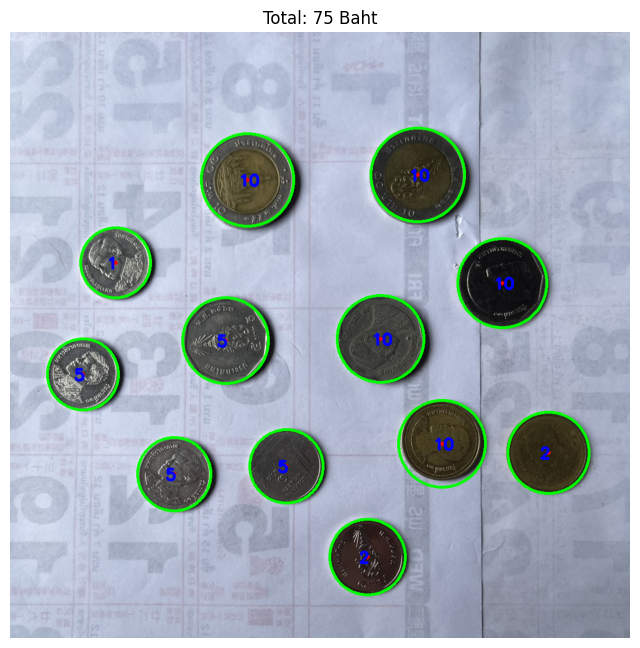

กำลังประมวลผลไฟล์: Homeworks/Homework_3/images/coins/Coin_2.png
------------------------------
File: Homeworks/Homework_3/images/coins/Coin_2.png
Detection Results:
  1 Baht: 5 coins
  2 Baht: 8 coins
  5 Baht: 9 coins
  10 Baht: 6 coins
Total Value: 126 Baht
------------------------------


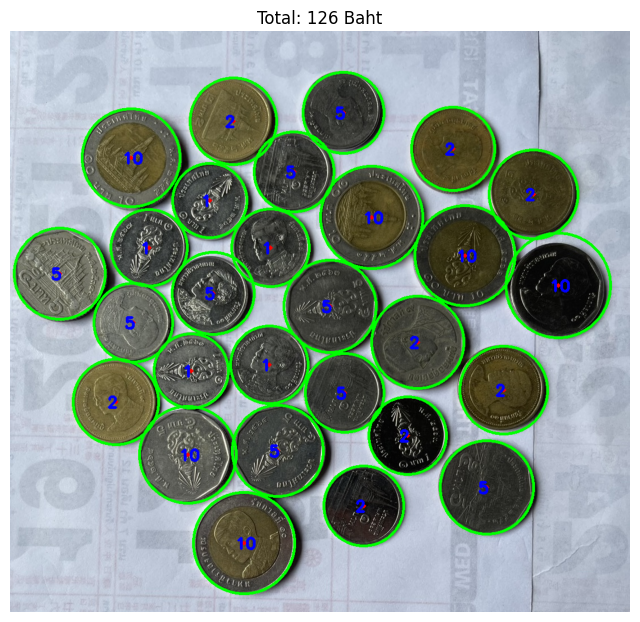

กำลังประมวลผลไฟล์: Homeworks/Homework_3/images/coins/Coin_3.png
------------------------------
File: Homeworks/Homework_3/images/coins/Coin_3.png
Detection Results:
  1 Baht: 6 coins
  2 Baht: 39 coins
  5 Baht: 1 coins
  10 Baht: 1 coins
Total Value: 99 Baht
------------------------------


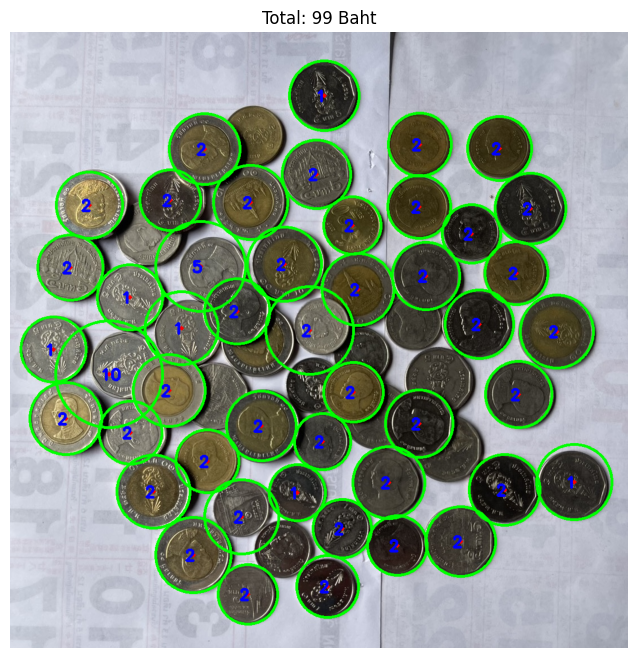

กำลังประมวลผลไฟล์: Homeworks/Homework_3/images/coins/Coin_4.png
------------------------------
File: Homeworks/Homework_3/images/coins/Coin_4.png
Detection Results:
  1 Baht: 13 coins
  2 Baht: 13 coins
  5 Baht: 2 coins
  10 Baht: 4 coins
Total Value: 89 Baht
------------------------------


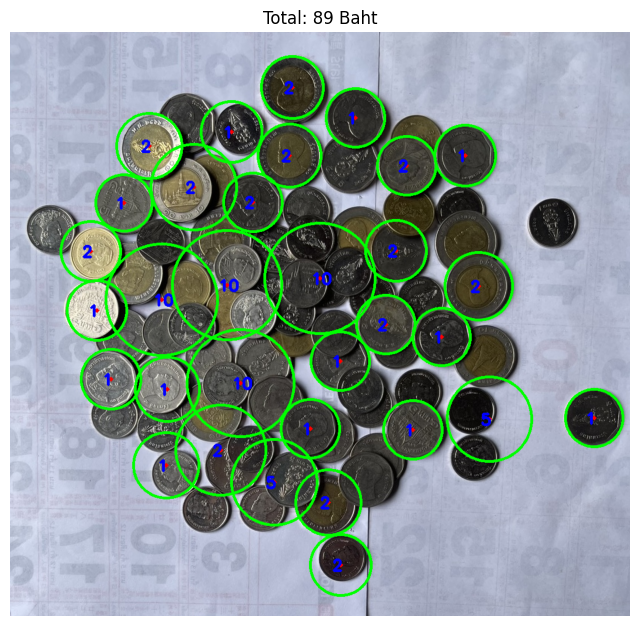

In [27]:
import glob
import os

COINS_DIR = 'Homeworks/Homework_3/images/coins'

# 1. รวบรวมรายชื่อไฟล์ทั้งหมด (ยังไม่เรียง)
image_paths = (
    glob.glob(os.path.join(COINS_DIR, '*.png')) +
    glob.glob(os.path.join(COINS_DIR, '*.jpg')) +
    glob.glob(os.path.join(COINS_DIR, '*.jpeg'))
)

if not image_paths:
    print(f"ไม่พบไฟล์รูปภาพในโฟลเดอร์: {COINS_DIR}")
else:
    # 2. เรียงลำดับรายชื่อไฟล์ตามชื่อ (Alphabetical/Lexicographical order)
    # ฟังก์ชัน sorted() จะส่งคืนลิสต์ใหม่ที่เรียงลำดับแล้ว
    sorted_image_paths = sorted(image_paths) 
    
    for full_img_path in sorted_image_paths: # ใช้ลิสต์ที่ถูกเรียงแล้วในการวนลูป
        print(f"กำลังประมวลผลไฟล์: {full_img_path}")
        # ฟังก์ชัน count_thai_coins จะได้รับ Full Path ของไฟล์
        count_thai_coins(full_img_path, param2=30, min_dist=100)